In [59]:
# Mostly a dummy test idea

# Functionalize network making algorithm
# Import Packages
import igraph as ig
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


In [2]:
# Functions that make network.
def makeProbMatrix(prob_list):
    A = prob_list[0]
    B = prob_list[1]
    C = prob_list[2]
    D = prob_list[3]
    return [[A, B, C, D],[B, A, D, C],[C, D, A, B],[D, C, B, A]]

def initializeNetwork(node_numbers, node_type):
    g = ig.Graph(directed = False)
    for k in range(len(node_numbers)):
        g.add_vertices(n = node_numbers[k])
        if k == 0:
            for m in range(0, node_numbers[k]):
                g.vs[m]['type'] = node_type[k]
                #g.vs[m]['attr1'] = node_attribute1[k]
                #g.vs[m]['attr2']  = node_attribute2[k]
        else:
            for m in range(sum(node_numbers[:k]), sum(node_numbers[:k+1])):
                g.vs[m]['type'] = node_type[k]
                #g.vs[m]['attr1'] = node_attribute1[k]
                #g.vs[m]['attr2'] = node_attribute2[k]
    return g

def addConnections(network, prob_matrix):
    for node in range(len(network.vs)):
        for other_node in range(node+1,total_Nodes):
            if (np.random.uniform()) < prob_matrix[network.vs[node]['type']][network.vs[other_node]['type']]:
                network.add_edge(node,other_node)
    return network

def MakeNetwork(node_numbers, node_type, prob_matrix):
    network = initializeNetwork(node_numbers, node_type)
    network = addConnections(network, prob_matrix)
    return network

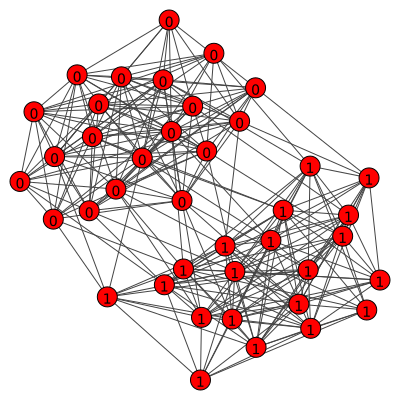

In [3]:
# Define n and P
# Each node is given a type which is based on the combination of attrbutes

node_numbers    = [20, 20] # Slows down a bit when total nodes > 400
total_Nodes     = sum(node_numbers)
node_type       = [0, 1]
node_attribute1 = [1, 1, 2, 2]
node_attribute2 = [1, 2, 1, 2]

prob_matrix =  makeProbMatrix([0.6, 0.07, 0.05, 0.02])

# Uncomment to check

#network = initializeNetwork(node_numbers, node_type)
#network = addConnections(network, prob_matrix)
network = MakeNetwork (node_numbers, node_type, prob_matrix)
ig.plot(network , bbox=(0,0,400,400), vertex_label=network.vs['type'])


In [6]:
# Lets check how much variation in degree assortativity and assortativity by type
# networks we get from the same p matrix
N = 100
assort = [0]*N
for k in range(N):
    graph     = MakeNetwork (node_numbers, node_type, prob_matrix)
    assort[k] = graph.assortativity('type')

In [7]:
print 'Toy network comparison'
print 'Set 1 Assorttativity = {:.4f} +- {:.4f}'.format(np.average(assort), np.std(assort))

Toy network comparison
Set 1 Assorttativity = 0.7797 +- 0.0362


In [10]:
plt.plot(range(N),assort)

plt.title('Assortativity Spread')
plt.xlabel('Toy network number')
plt.ylabel('Assortativity by node type')
plt.ylim(.55,1.05)
#plt.savefig('assortativity_spread.png', bbox_inches='tight')

plt.show()

In [50]:
A = np.linspace(0,10,21)
B = np.linspace(0,10,21)
A1,B1 = np.meshgrid(A,B)
counter = 0
measure = np.zeros([len(A), len(B)])
for a in range(len(A)):
    for b in range(len(B)):
        graph   = MakeNetwork(node_numbers, node_type, makeProbMatrix([A[a],B[b],0,0]))
        measure[a][b] = graph.assortativity('type')
        counter = counter + 1